In [9]:
%pylab inline
import torch
import torch.nn as nn
from tqdm import trange
from model import ModelM3

Populating the interactive namespace from numpy and matplotlib


In [2]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("./tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp): 
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [6]:
print(f"length of training data : {len(X_train)}, length of test data : {len(X_test)}")

length of training data : 60000, length of test data : 10000


In [10]:
model = ModelM3()
model.load_state_dict(torch.load("./pretrained/E_1000_B_256.pth"))
model.eval()

ModelM3(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv2_bn): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 80, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv4_bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(80, 96, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv5_bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(96, 112, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv6_bn): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, track_running_

Predicted Value : 1, Ground Truth : 1


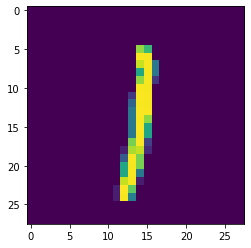

In [61]:
samp = torch.randint(0, 10000, (1,)).item()
pred = model(torch.tensor(X_test[samp].reshape(-1,1,28,28)).float())
imshow(X_test[samp])
print(f"Predicted Value : {torch.argmax(pred).item()}, Ground Truth : {Y_test[samp]}")

In [63]:
total_pred = np.zeros(0)
total_target = np.zeros(0)
correct = 0 
loss_function = nn.CrossEntropyLoss()
BS = 256
with torch.no_grad():
    samp = np.random.randint(0, X_test.shape[0], size=(BS))
    X = torch.tensor(X_test[samp]).reshape(-1,1,28,28).float()
    Y = torch.tensor(Y_test[samp]).long()
    output = model(X)
    loss = loss_function(output, Y)  
    pred = output.argmax(dim=1, keepdim=True)
    total_pred = np.append(total_pred, pred.cpu().numpy())
    total_target = np.append(total_target, Y.cpu().numpy())
    correct += pred.eq(Y.view_as(pred)).sum().item()
print(f"Test accuracy : {((correct/BS)) * 100.}")

Test accuracy : 99.609375
